## Importing Libraries 

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#data cleaning and preprocessing
import re
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#model building
from tensorflow.keras.layers import Dense,Embedding,LSTM,Dropout
from tensorflow.keras.models import Sequential

In [252]:
df_train=pd.read_csv(r"SMS_train.csv",encoding='latin-1')#it supports on non-ascii keywords

In [253]:
df_train

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time ü finish?,Non-Spam


In [254]:
df_test=pd.read_csv(r"SMS_test.csv",encoding='latin-1')

In [212]:
df_test

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


## Data-Cleaning & Preprocessing

In [213]:
#need to drop S.No. column and Label needs to be encoded

In [214]:
df_train.columns

Index(['S. No.', 'Message_body', 'Label'], dtype='object')

In [215]:
#By using label encoding techniques also u can try
df_train['Label']=df_train['Label'].map({'Spam':0,'Non-Spam':1})
df_test['Label']=df_test['Label'].map({'Spam':0,'Non-Spam':1})

In [216]:
df_train

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,1
1,2,The guy did some bitching but I acted like i'd...,1
2,3,"Pity, * was in mood for that. So...any other s...",1
3,4,Will ü b going to esplanade fr home?,1
4,5,This is the 2nd time we have tried 2 contact u...,0
...,...,...,...
952,953,hows my favourite person today? r u workin har...,1
953,954,How much you got for cleaning,1
954,955,Sorry da. I gone mad so many pending works wha...,1
955,956,Wat time ü finish?,1


In [217]:
df_train = df_train.drop('S. No.', axis=1)
df_test = df_test.drop('S. No.', axis=1)

In [218]:
STOPWORDS = stopwords.words("english") #it is inbuild stopwords you can build ur own stop words

In [219]:
def clean(text):
    text = text.lower()
    text = re.sub("(http|https|www)(:|\.)\S+.com"," ",text)
    text = re.sub("[^\w\d]"," ",text)
    text = " ".join([t for t in text.split() if t not in STOPWORDS])
    return text

In [220]:
check=clean("hello I'm Sharanya! do subscribe to data-discovery")
check

'hello sharanya subscribe data discovery'

In [221]:
df_train["text"] = df_train["Message_body"].apply(lambda x : clean(x))
df_test["text"] = df_test["Message_body"].apply(lambda x : clean(x))

In [222]:
df_train

,Message_body,Label,text
0,Rofl. Its true to its name,1,rofl true name
1,The guy did some bitching but I acted like i'd...,1,guy bitching acted like interested buying some...
2,"Pity, * was in mood for that. So...any other s...",1,pity mood suggestions
3,Will ü b going to esplanade fr home?,1,ü b going esplanade fr home
4,This is the 2nd time we have tried 2 contact u...,0,2nd time tried 2 contact u u 750 pound prize 2...
...,...,...,...
952,hows my favourite person today? r u workin har...,1,hows favourite person today r u workin hard sl...
953,How much you got for cleaning,1,much got cleaning
954,Sorry da. I gone mad so many pending works wha...,1,sorry da gone mad many pending works
955,Wat time ü finish?,1,wat time ü finish


In [223]:
df_train = df_train.drop('Message_body', axis=1)
df_test = df_test.drop('Message_body', axis=1)

In [224]:
df_test

,Label,text
0,0,upgrdcentre orange customer may claim free cam...
1,0,loan purpose 500 75 000 homeowners tenants wel...
2,0,congrats nokia 3650 video camera phone call 09...
3,0,urgent mobile number awarded 2000 prize guaran...
4,0,someone contacted dating service entered phone...
...,...,...
120,1,7 wonders world 7th 6th ur style 5th ur smile ...
121,1,try something dear read something exams
122,1,sun ah thk mayb dun anythin thk book e lesson ...
123,1,symptoms u love 1 u like listening songs 2 u g...


## Encoding 

In [225]:
#Word to Vec conversion
vocab_size=5000
ml = 20 #max_length

In [226]:
token = Tokenizer(num_words=vocab_size)
token.fit_on_texts(df_train.text)

In [227]:
x_train = token.texts_to_sequences(df_train.text)
x_test = token.texts_to_sequences(df_test.text)

In [228]:
df_train['text']

0                                         rofl true name
1      guy bitching acted like interested buying some...
2                                  pity mood suggestions
3                            ü b going esplanade fr home
4      2nd time tried 2 contact u u 750 pound prize 2...
                             ...                        
952    hows favourite person today r u workin hard sl...
953                                    much got cleaning
954                 sorry da gone mad many pending works
955                                    wat time ü finish
956                                         glad talking
Name: text, Length: 957, dtype: object

In [229]:
x_train[1]

[219, 1180, 702, 12, 515, 397, 138, 220, 92, 41, 398, 72, 8]

In [230]:
#Convert the text into equal dimensions by using padding sequence
x_train = pad_sequences(x_train,truncating="pre",maxlen=ml,padding="pre")
x_test = pad_sequences(x_test,truncating="pre",maxlen=ml,padding="pre")

In [231]:
x_train

array([[   0,    0,    0, ..., 1179,  187,  164],
       [   0,    0,    0, ...,  398,   72,    8],
       [   0,    0,    0, ..., 1181, 1182, 1183],
       ...,
       [   0,    0,    0, ...,   90, 3058,  332],
       [   0,    0,    0, ...,   13,   27,  185],
       [   0,    0,    0, ...,    0,  675,  671]])

## Model Building 

In [232]:
model = Sequential([ 
    
    Embedding(vocab_size,100,input_length=ml),
    Dropout(0.2),
    LSTM(200),
    Dropout(0.2),
    Dense(1,activation="sigmoid")
])

In [233]:
#during model building what all compilation u need to do
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["acc"])

In [234]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 100)           500000    
                                                                 
 dropout_6 (Dropout)         (None, 20, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 200)               240800    
                                                                 
 dropout_7 (Dropout)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 741,001
Trainable params: 741,001
Non-trainable params: 0
_________________________________________________________________


In [235]:
history = model.fit(x_train,df_train["Label"],batch_size=32,epochs=5,validation_data=(x_test,df_test["Label"]))

Epoch 1/5
30/30 [==============================] - 11s 150ms/step - loss: 0.3939 - acc: 0.8621 - val_loss: 1.6883 - val_acc: 0.4480
Epoch 2/5
30/30 [==============================] - 3s 87ms/step - loss: 0.1512 - acc: 0.9624 - val_loss: 0.4945 - val_acc: 0.7760
Epoch 3/5
30/30 [==============================] - 2s 78ms/step - loss: 0.0530 - acc: 0.9864 - val_loss: 0.1915 - val_acc: 0.9200
Epoch 4/5
30/30 [==============================] - 2s 79ms/step - loss: 0.0179 - acc: 0.9948 - val_loss: 0.1126 - val_acc: 0.9600
Epoch 5/5
30/30 [==============================] - 2s 79ms/step - loss: 0.0209 - acc: 0.9969 - val_loss: 0.2360 - val_acc: 0.9040


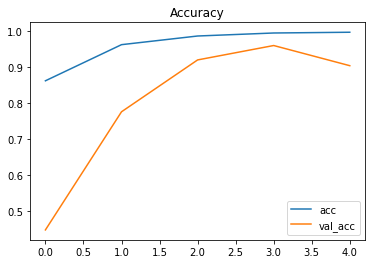

In [236]:
history_df  = pd.DataFrame(history.history)
history_df[["acc","val_acc"]].plot(title="Accuracy")
plt.style.use('dark_background')

<AxesSubplot:title={'center':'Loss'}>

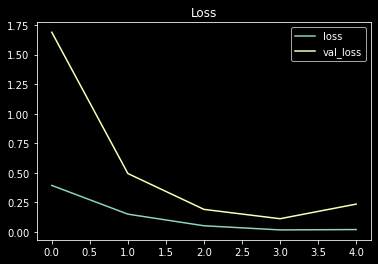

In [257]:
history_df[['loss','val_loss']].plot(title='Loss')

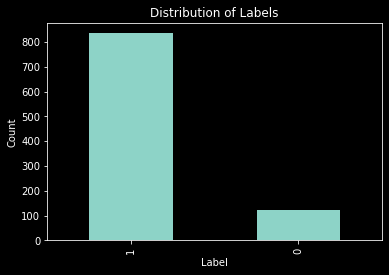

In [241]:
label_counts = df_train['Label'].value_counts()

# Create a bar plot
label_counts.plot(kind='bar')

# Add labels and a title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')

# Show the plot
plt.show()


In [242]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
# Filter rows where 'Label' is 1
non_spam_rows = df_train[df_train['Label'] == 1]

# Calculate the number of rows to remove (50% of non-spam rows)
num_rows_to_remove = len(non_spam_rows) // 4

# Randomly sample and drop the specified number of rows
if num_rows_to_remove > 0:
    rows_to_remove = np.random.choice(non_spam_rows.index, num_rows_to_remove, replace=False)
    df_train = df_train.drop(rows_to_remove)

# Now, df contains 50% of the non-spam rows randomly sampled


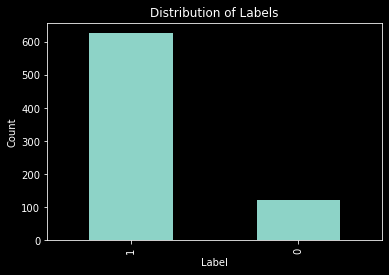

In [243]:
label_counts = df_train['Label'].value_counts()

# Create a bar plot
label_counts.plot(kind='bar')

# Add labels and a title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')

# Show the plot
plt.show()


In [244]:
df_train

,Label,text
0,1,rofl true name
1,1,guy bitching acted like interested buying some...
3,1,ü b going esplanade fr home
4,0,2nd time tried 2 contact u u 750 pound prize 2...
5,0,reminder o2 get 2 50 pounds free call credit d...
...,...,...
952,1,hows favourite person today r u workin hard sl...
953,1,much got cleaning
954,1,sorry da gone mad many pending works
955,1,wat time ü finish
